In [ ]:
import os
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import statsmodels.api  as sm
from sklearn import svm

In [ ]:
def Exo_SIR_model(y, t, beta, gamma,IX0):
    s,i,r = y[0],y[1],y[2]
    i_x=IX0

    ds__dt = -beta*s*i-i_x
    di__dt = beta*s*i+i_x-gamma*i
    dr__dt = gamma*i
    
    return([ds__dt, di__dt, dr__dt])

In [ ]:
data1=pd. read_csv('/content/full_lockdown - Kerala_time_series.csv')
data1.head()
N=1000000

,Unnamed: 0,Daily Conf,Daily Rec,Daily Death,Imported_daily,N
0,NaN,1,0,0,0,1000000
1,NaN,2,0,0,0,1000000
2,NaN,2,0,0,0,1000000
3,NaN,2,0,1,0,1000000
4,NaN,3,0,1,0,1000000


In [ ]:
#N=34600000
del data1['Unnamed: 0']

In [ ]:
data1.columns=['DC','DR','DD','Imp_DC','N']
print(data1)

    DC  DR  DD  Imp_DC        N
0    1   0   0       0  1000000
1    2   0   0       0  1000000
2    2   0   0       0  1000000
3    2   0   1       0  1000000
4    3   0   1       0  1000000
5    3   1   1       0  1000000
6    4   2   2       0  1000000
7    5   3   2       0  1000000
8    6   4   3       0  1000000
9    6   4   3       0  1000000
10   6   4   4       0  1000000
11   7   5   4       0  1000000
12   8   5   5       0  1000000
13   9   5   5       0  1000000
14   9   6   6       0  1000000
15  10   7   6       0  1000000
16  11   8   6       0  1000000
17  11   8   7       0  1000000
18  12   9   8       0  1000000
19  12  10   8       0  1000000
20  13  11   8       0  1000000
21  14  12   9       0  1000000
22  15  13  10       0  1000000
23  16  14  11       0  1000000
24  17  14  12       0  1000000
25  18  14  12       0  1000000
26  19  15  12       0  1000000
27  20  15  13       0  1000000
28  21  15  14       0  1000000
29  22  16  15       0  1000000
30  23  

In [ ]:
def cumulative_sum(arr):
  l=[]
  for i in range(len(arr)):
    if i==0:
      l.append(arr[0])
    else:
      l.append(l[i-1]+arr[i])
  return l

In [ ]:
TC=cumulative_sum(data1['DC']+data1['Imp_DC'])
data1['TC']=TC
data1.head()
TR=cumulative_sum(data1['DR'])
data1['TR']=TR
Total_Imp=cumulative_sum(data1['Imp_DC'])
data1['Total_Imp']=Total_Imp
TD=cumulative_sum(data1['DD'])
data1['TD']=TD
data1.head()

,DC,DR,DD,Imp_DC,N,TC,TR,Total_Imp,TD
0,1,0,0,0,1000000,1,0,0,0
1,2,0,0,0,1000000,3,0,0,0
2,2,0,0,0,1000000,5,0,0,0
3,2,0,1,0,1000000,7,0,0,1
4,3,0,1,0,1000000,10,0,0,2


In [ ]:
Sus = data1.N - data1.TC - data1.TR
data1['S'] = Sus
data1.head()

,DC,DR,DD,Imp_DC,N,TC,TR,Total_Imp,TD,S
0,1,0,0,0,1000000,1,0,0,0,999999
1,2,0,0,0,1000000,3,0,0,0,999997
2,2,0,0,0,1000000,5,0,0,0,999995
3,2,0,1,0,1000000,7,0,0,1,999993
4,3,0,1,0,1000000,10,0,0,2,999990


In [ ]:
sus = data1.S/N
data1['s'] = sus
data1.head()

,DC,DR,DD,Imp_DC,N,TC,TR,Total_Imp,TD,S,s
0,1,0,0,0,1000000,1,0,0,0,999999,0.028902
1,2,0,0,0,1000000,3,0,0,0,999997,0.028902
2,2,0,0,0,1000000,5,0,0,0,999995,0.028902
3,2,0,1,0,1000000,7,0,0,1,999993,0.028902
4,3,0,1,0,1000000,10,0,0,2,999990,0.028901


In [ ]:
daywise_fractions = []
for inf in data1.DC:
    daywise_fractions.append(inf/sum(data1.DC))
daywise_fractions

[0.002849002849002849,
 0.005698005698005698,
 0.005698005698005698,
 0.005698005698005698,
 0.008547008547008548,
 0.008547008547008548,
 0.011396011396011397,
 0.014245014245014245,
 0.017094017094017096,
 0.017094017094017096,
 0.017094017094017096,
 0.019943019943019943,
 0.022792022792022793,
 0.02564102564102564,
 0.02564102564102564,
 0.02849002849002849,
 0.03133903133903134,
 0.03133903133903134,
 0.03418803418803419,
 0.03418803418803419,
 0.037037037037037035,
 0.039886039886039885,
 0.042735042735042736,
 0.045584045584045586,
 0.04843304843304843,
 0.05128205128205128,
 0.05413105413105413,
 0.05698005698005698,
 0.05982905982905983,
 0.06267806267806268,
 0.06552706552706553,
 0.06837606837606838]

In [ ]:
I_X = data1.Total_Imp
data1['I_X'] = I_X
I_E = data1.TC - data1.Total_Imp
data1['I_E'] = I_E

i_x = I_X/N
i_e = I_E/N
data1['i_x'] = i_x
data1['i_e'] = i_e

data1

,DC,DR,DD,Imp_DC,N,TC,TR,Total_Imp,TD,S,s,I_X,I_E,i_x,i_e
0,1,0,0,0,1000000,1,0,0,0,999999,0.028902,0,1,0.0,2.890173e-08
1,2,0,0,0,1000000,3,0,0,0,999997,0.028902,0,3,0.0,8.670520e-08
2,2,0,0,0,1000000,5,0,0,0,999995,0.028902,0,5,0.0,1.445087e-07
3,2,0,1,0,1000000,7,0,0,1,999993,0.028902,0,7,0.0,2.023121e-07
4,3,0,1,0,1000000,10,0,0,2,999990,0.028901,0,10,0.0,2.890173e-07
5,3,1,1,0,1000000,13,1,0,3,999986,0.028901,0,13,0.0,3.757225e-07
6,4,2,2,0,1000000,17,3,0,5,999980,0.028901,0,17,0.0,4.913295e-07
7,5,3,2,0,1000000,22,6,0,7,999972,0.028901,0,22,0.0,6.358382e-07
8,6,4,3,0,1000000,28,10,0,10,999962,0.028901,0,28,0.0,8.092486e-07
9,6,4,3,0,1000000,34,14,0,13,999952,0.028900,0,34,0.0,9.826590e-07


In [ ]:
i = data1.TC/N
data1['i'] = i
r = data1.TR/N
data1['r'] = r

di_dt = (data1.DC+data1.Imp_DC)/N
data1['di_dt'] = di_dt
dr_dt = data1.DR/N
data1['dr_dt'] = dr_dt

In [ ]:
dix_dt = [0]
die_dt = [0]
for i in range(1,len(data1)):
    temp1 = data1.i_x[i]-data1.i_x[i-1]
    temp2 = data1.i_e[i]-data1.i_e[i-1]
    
    if temp1>0:
        dix_dt.append(temp1)
    else:
        dix_dt.append(-1*temp1)
        
    if temp2>0:
        die_dt.append(temp2)
    else:
        die_dt.append(-1*temp2)
        
print(len(dix_dt))
print(len(die_dt))

data1['dix_dt'] = dix_dt
data1['die_dt'] = die_dt
data1.head()

32
32


,DC,DR,DD,Imp_DC,N,TC,TR,Total_Imp,TD,S,...,I_X,I_E,i_x,i_e,i,r,di_dt,dr_dt,dix_dt,die_dt
0,1,0,0,0,1000000,1,0,0,0,999999,...,0,1,0.0,2.890173e-08,2.890173e-08,0.0,2.890173e-08,0.0,0.0,0.000000e+00
1,2,0,0,0,1000000,3,0,0,0,999997,...,0,3,0.0,8.670520e-08,8.670520e-08,0.0,5.780347e-08,0.0,-0.0,5.780347e-08
2,2,0,0,0,1000000,5,0,0,0,999995,...,0,5,0.0,1.445087e-07,1.445087e-07,0.0,5.780347e-08,0.0,-0.0,5.780347e-08
3,2,0,1,0,1000000,7,0,0,1,999993,...,0,7,0.0,2.023121e-07,2.023121e-07,0.0,5.780347e-08,0.0,-0.0,5.780347e-08
4,3,0,1,0,1000000,10,0,0,2,999990,...,0,10,0.0,2.890173e-07,2.890173e-07,0.0,8.670520e-08,0.0,-0.0,8.670520e-08


In [ ]:
Gamma =  data1.dr_dt / data1.i
print('daywise gamma for Kerala\n')
gamma=st.mean(Gamma)
print(gamma)

daywise gamma for Kerala

0.06921551208424458


In [ ]:
Beta = (Gamma*data1.i+data1.di_dt-i_x) / (data1.s*data1.i)
print('daywise beta_x for Kerala')

beta=st.mean(Beta)
print(beta)

daywise beta_x for Kerala
8.821397595600732


In [ ]:
S0 = data1.loc[31,'s']
I0 = data1.loc[31,'i']
IEX = data1.loc[31,'i_x']
R0 = data1.loc[31,'r']
print(S0)
print(I0)
print(IEX)
print(R0)

#print(IX0)
#beta_x = beta_x_mean
#beta_e = beta_e_mean
#gamma = gamma_mean

# time vector
t = np.array([i for i in range(1000)])


# Result
solution1 = scipy.integrate.odeint(Exo_SIR_model,[S0, I0, R0], t, args=(beta,gamma,IEX))
#solution1=scipy.integrate.solve_ivp(Exo_SIR_model, t, [S0,I0,R0], method='RK45',args=(beta,gamma,IEX),max_step=1)
print(solution1)
solution1 = np.array(solution1)
#print(S0)
#print(IX0)
#print(IE0)
#print(R0)

0.02888421965317919
1.0144508670520232e-05
0.0
7.3699421965317915e-06
[[ 2.88842197e-02  1.01445087e-05  7.36994220e-06]
 [ 2.88813730e-02  1.22178621e-05  8.14327856e-06]
 [ 2.88779520e-02  1.47093964e-05  9.07272551e-06]
 ...
 [ 8.05236486e-04 -4.23366854e-12  2.80964976e-02]
 [ 8.05236486e-04 -4.17145738e-12  2.80964976e-02]
 [ 8.05236486e-04 -4.10924621e-12  2.80964976e-02]]


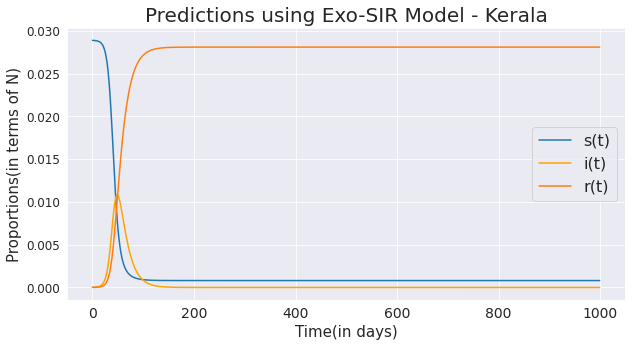

In [ ]:
plt.figure(figsize = (10,5))
scalefactor=1000000
plt.plot(t, solution1[:,0], label = 's(t)')
#plt.plot(t, solution1[:,1], label = 'i_x(t)', c='blue')
plt.plot(t, solution1[:,1], label = 'i(t)', c='orange')
plt.plot(t, solution1[:,2], label = 'r(t)')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - Kerala", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)
#plt.savefig('png')
plt.show()

In [ ]:
data1['s']

0     0.028902
1     0.028902
2     0.028902
3     0.028902
4     0.028901
5     0.028901
6     0.028901
7     0.028901
8     0.028901
9     0.028900
10    0.028900
11    0.028900
12    0.028899
13    0.028899
14    0.028898
15    0.028898
16    0.028897
17    0.028897
18    0.028896
19    0.028896
20    0.028895
21    0.028894
22    0.028893
23    0.028893
24    0.028892
25    0.028891
26    0.028890
27    0.028889
28    0.028888
29    0.028887
30    0.028885
31    0.028884
Name: s, dtype: float64

In [ ]:
data1['i']

0     2.890173e-08
1     8.670520e-08
2     1.445087e-07
3     2.023121e-07
4     2.890173e-07
5     3.757225e-07
6     4.913295e-07
7     6.358382e-07
8     8.092486e-07
9     9.826590e-07
10    1.156069e-06
11    1.358382e-06
12    1.589595e-06
13    1.849711e-06
14    2.109827e-06
15    2.398844e-06
16    2.716763e-06
17    3.034682e-06
18    3.381503e-06
19    3.728324e-06
20    4.104046e-06
21    4.508671e-06
22    4.942197e-06
23    5.404624e-06
24    5.895954e-06
25    6.416185e-06
26    6.965318e-06
27    7.543353e-06
28    8.150289e-06
29    8.786127e-06
30    9.450867e-06
31    1.014451e-05
Name: i, dtype: float64

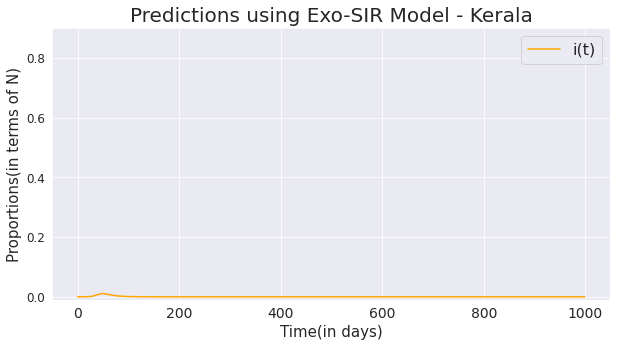

0.010821342552269944 [49]


In [ ]:
plt.figure(figsize = (10,5))
scalefactor=1000000
plt.ylim(-0.01,0.9)
#plt.plot(t, solution1[:,0], label = 's(t)')
#plt.plot(t, solution1[:,1], label = 'i_x(t)', c='blue')
plt.plot(t, solution1[:,1], label = 'i(t)', c='orange')
#plt.plot(t, solution1[:,2], label = 'r(t)')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - Kerala", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)

#plt.savefig('png')
plt.show()
ymax = max(solution1[:,1])
xpos = np.where(solution1[:,1] == ymax)
xmax = t[xpos]
print(ymax,xmax)

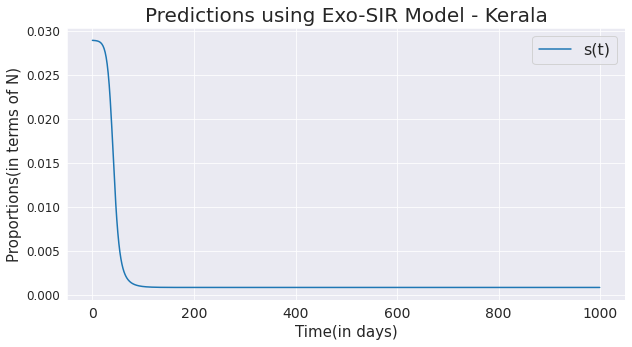

In [ ]:
plt.figure(figsize = (10,5))
scalefactor=1000000
plt.plot(t, solution1[:,0], label = 's(t)')
#plt.plot(t, solution1[:,1], label = 'i_x(t)', c='blue')
# plt.plot(t, solution1[:,1], label = 'i(t)', c='orange')
# plt.plot(t, solution1[:,2], label = 'r(t)')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - Kerala", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)
#plt.savefig('png')
plt.show()

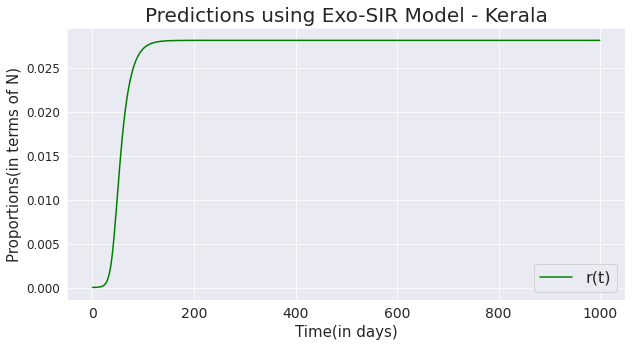

In [ ]:
plt.figure(figsize = (10,5))
scalefactor=1000000
#plt.plot(t, solution1[:,0], label = 's(t)')
#plt.plot(t, solution1[:,1], label = 'i_x(t)', c='blue')
# plt.plot(t, solution1[:,1], label = 'i(t)', c='orange')
plt.plot(t, solution1[:,2], label = 'r(t)',c="green")

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIR Model - Kerala", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=14)
plt.yticks(size=12)
#plt.savefig('png')
plt.show()